In [ ]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time

In [ ]:
ticker = 'SPY'
days = 360

# Loading

In [ ]:
present = datetime.datetime.now().date()
past = present - datetime.timedelta(days = days)
print("Trades from {} to {}".format(past, present))

Trades from 2021-12-22 to 2022-12-17


In [ ]:
# Gets url response
res = requests.get("https://api.polygon.io/v2/aggs/ticker/{}/range/1/hour/{}/{}?adjusted=true&sort=asc&limit=50000&apiKey=yuasIoFiphAuTZl8p0_ohMDGYCIzpzVF".format(ticker, past, present))

# Parses the text response in dataframe
df = pd.read_json(res.text)

df

,ticker,queryCount,resultsCount,adjusted,results,status,request_id,count
0,SPY,50000,925,True,"{'v': 49571, 'vw': 462.1607, 'o': 461.98, 'c':...",DELAYED,30d892421c641058b363d6047d67afe9,925
1,SPY,50000,925,True,"{'v': 22846, 'vw': 462.8083, 'o': 462.18, 'c':...",DELAYED,30d892421c641058b363d6047d67afe9,925
2,SPY,50000,925,True,"{'v': 91607, 'vw': 463.2261, 'o': 463.08, 'c':...",DELAYED,30d892421c641058b363d6047d67afe9,925
3,SPY,50000,925,True,"{'v': 110718, 'vw': 463.3737, 'o': 463.6, 'c':...",DELAYED,30d892421c641058b363d6047d67afe9,925
4,SPY,50000,925,True,"{'v': 373009, 'vw': 462.3856, 'o': 463.26, 'c'...",DELAYED,30d892421c641058b363d6047d67afe9,925
...,...,...,...,...,...,...,...,...
920,SPY,50000,925,True,"{'v': 7578901.0, 'vw': 432.2928, 'o': 433.05, ...",DELAYED,30d892421c641058b363d6047d67afe9,925
921,SPY,50000,925,True,"{'v': 9163000.0, 'vw': 430.8374, 'o': 431.6608...",DELAYED,30d892421c641058b363d6047d67afe9,925
922,SPY,50000,925,True,"{'v': 33752014.0, 'vw': 428.0258, 'o': 430.99,...",DELAYED,30d892421c641058b363d6047d67afe9,925
923,SPY,50000,925,True,"{'v': 34166488.0, 'vw': 432.2202, 'o': 429.93,...",DELAYED,30d892421c641058b363d6047d67afe9,925


# Cleaning

In [ ]:
# Preview of [results] column

df["results"][0]

{'v': 49571,
 'vw': 462.1607,
 'o': 461.98,
 'c': 462.04,
 'h': 462.46,
 'l': 461.83,
 't': 1640163600000,
 'n': 391}

In [ ]:
# Gets total length of the data

DF_LENGTH = len(df)

In [ ]:
# Parses the [results] column into a seperate dataframe 

df_aug = pd.DataFrame([df["results"][0]])

for i in range(1, DF_LENGTH):
    df_curr = pd.DataFrame([df["results"][i]])
    df_aug = df_aug.append(df_curr, ignore_index=True)
    
df_aug

,v,vw,o,c,h,l,t,n
0,49571.0,462.1607,461.9800,462.0400,462.4600,461.83,1640163600000,391
1,22846.0,462.8083,462.1800,463.0500,463.1300,462.10,1640167200000,244
2,91607.0,463.2261,463.0800,463.6200,463.6300,462.98,1640170800000,625
3,110718.0,463.3737,463.6000,463.0100,463.6700,463.01,1640174400000,920
4,373009.0,462.3856,463.2600,462.0500,463.6399,461.68,1640178000000,2877
...,...,...,...,...,...,...,...,...
920,7578901.0,432.2928,433.0500,431.6650,433.5800,431.15,1647446400000,78312
921,9163000.0,430.8374,431.6608,431.3465,431.9000,430.02,1647450000000,98111
922,33752014.0,428.0258,430.9900,429.9500,431.4600,424.80,1647453600000,437038
923,34166488.0,432.2202,429.9300,435.6100,435.6800,429.39,1647457200000,303971


In [ ]:
# drops the [vw], [n] columns

df_dropped = df_aug.drop(['vw','n'],axis=1)

df_dropped

,v,o,c,h,l,t
0,49571.0,461.9800,462.0400,462.4600,461.83,1640163600000
1,22846.0,462.1800,463.0500,463.1300,462.10,1640167200000
2,91607.0,463.0800,463.6200,463.6300,462.98,1640170800000
3,110718.0,463.6000,463.0100,463.6700,463.01,1640174400000
4,373009.0,463.2600,462.0500,463.6399,461.68,1640178000000
...,...,...,...,...,...,...
920,7578901.0,433.0500,431.6650,433.5800,431.15,1647446400000
921,9163000.0,431.6608,431.3465,431.9000,430.02,1647450000000
922,33752014.0,430.9900,429.9500,431.4600,424.80,1647453600000
923,34166488.0,429.9300,435.6100,435.6800,429.39,1647457200000


In [ ]:
# Renames all columns in place

df_dropped.rename(columns = {'v':'Volume', 'o':'Open', 'c':'Close', 'h':'Highest', 'l':'Lowest', 't':'Timestamp',}, inplace = True)

df_dropped

,Volume,Open,Close,Highest,Lowest,Timestamp
0,49571.0,461.9800,462.0400,462.4600,461.83,1640163600000
1,22846.0,462.1800,463.0500,463.1300,462.10,1640167200000
2,91607.0,463.0800,463.6200,463.6300,462.98,1640170800000
3,110718.0,463.6000,463.0100,463.6700,463.01,1640174400000
4,373009.0,463.2600,462.0500,463.6399,461.68,1640178000000
...,...,...,...,...,...,...
920,7578901.0,433.0500,431.6650,433.5800,431.15,1647446400000
921,9163000.0,431.6608,431.3465,431.9000,430.02,1647450000000
922,33752014.0,430.9900,429.9500,431.4600,424.80,1647453600000
923,34166488.0,429.9300,435.6100,435.6800,429.39,1647457200000


In [ ]:
# Converts Unix timestamp to Datetime

df_dropped['Timestamp'] = pd.to_datetime(df_dropped['Timestamp'],unit='ms')

df_dropped

,Volume,Open,Close,Highest,Lowest,Timestamp
0,49571.0,461.9800,462.0400,462.4600,461.83,2021-12-22 09:00:00
1,22846.0,462.1800,463.0500,463.1300,462.10,2021-12-22 10:00:00
2,91607.0,463.0800,463.6200,463.6300,462.98,2021-12-22 11:00:00
3,110718.0,463.6000,463.0100,463.6700,463.01,2021-12-22 12:00:00
4,373009.0,463.2600,462.0500,463.6399,461.68,2021-12-22 13:00:00
...,...,...,...,...,...,...
920,7578901.0,433.0500,431.6650,433.5800,431.15,2022-03-16 16:00:00
921,9163000.0,431.6608,431.3465,431.9000,430.02,2022-03-16 17:00:00
922,33752014.0,430.9900,429.9500,431.4600,424.80,2022-03-16 18:00:00
923,34166488.0,429.9300,435.6100,435.6800,429.39,2022-03-16 19:00:00


In [ ]:
df_dropped['Hour'] = df_dropped.Timestamp.dt.hour
df_dropped['Hour'].head()

0     9
1    10
2    11
3    12
4    13
Name: Hour, dtype: int64

In [ ]:
# get info for regular market hours only (from 9 a.m. to 4 p.m. ET.)
START_HOUR = 9
END_HOUR = 16

print('Shape before drop:', df_dropped.shape)
df_dropped = df_dropped[df_dropped['Hour'].between(START_HOUR, END_HOUR)]
print('Shape after drop:', df_dropped.shape)

Shape before drop: (925, 7)
Shape after drop: (464, 7)


In [ ]:
df_dropped['Profit'] = df_dropped.apply(lambda row: row['Close'] - row['Open'], axis=1)
df_dropped['Profit'].head()

<ipython-input-252-93da0f995481>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Profit'] = df_dropped.apply(lambda row: row['Close'] - row['Open'], axis=1)


0    0.06
1    0.87
2    0.54
3   -0.59
4   -1.21
Name: Profit, dtype: float64

In [ ]:
# Reindex the DataFrame with a new incrementing index
df_reindex = df_dropped.reset_index(drop=False)

In [ ]:
df_reindex

,index,Volume,Open,Close,Highest,Lowest,Timestamp,Hour,Profit
0,0,49571.0,461.98,462.040,462.4600,461.830,2021-12-22 09:00:00,9,0.060
1,1,22846.0,462.18,463.050,463.1300,462.100,2021-12-22 10:00:00,10,0.870
2,2,91607.0,463.08,463.620,463.6300,462.980,2021-12-22 11:00:00,11,0.540
3,3,110718.0,463.60,463.010,463.6700,463.010,2021-12-22 12:00:00,12,-0.590
4,4,373009.0,463.26,462.050,463.6399,461.680,2021-12-22 13:00:00,13,-1.210
...,...,...,...,...,...,...,...,...,...
459,916,819932.0,431.28,430.150,431.7500,425.500,2022-03-16 12:00:00,12,-1.130
460,917,11858031.0,430.10,431.930,432.6700,429.520,2022-03-16 13:00:00,13,1.830
461,918,20939912.0,431.93,433.310,434.5500,430.734,2022-03-16 14:00:00,14,1.380
462,919,9942289.0,433.31,433.030,433.4800,432.180,2022-03-16 15:00:00,15,-0.280


In [ ]:
# Add two columns (features). 
# 1. Total profit for that hour interval in last N days
# 2. Number of days making profit for that hour interval in last N days

NUM_HOURS = END_HOUR - START_HOUR + 1
LAST_N_DAYS = 30

def get_total_profit_prev_n_days(current_row):
  total_profit = 0
  for i in range(1, LAST_N_DAYS+1):
    total_profit = total_profit + df_reindex.at[current_row - (NUM_HOURS * i), 'Profit']
  return total_profit

def get_number_of_profit_days_prev_n_days(current_row):
  number_of_profit_days = 0
  for i in range(1, LAST_N_DAYS+1):
    if df_reindex.at[current_row - (NUM_HOURS * i), 'Profit'] > 0:
      number_of_profit_days = number_of_profit_days + 1
  return number_of_profit_days

In [ ]:
DF_DROPPED_LEN = len(df_reindex)

for i in range(DF_DROPPED_LEN):
  # for the first n days in the data, we don't have the value for these two columns
  if i < NUM_HOURS * LAST_N_DAYS:
    df_reindex.at[i, 'Total Profit in Last N Days'] = 0
    df_reindex.at[i, 'Profit Days in Last N Days'] = 0
  else: 
    df_reindex.at[i, 'Total Profit in Last N Days'] = get_total_profit_prev_n_days(i)
    df_reindex.at[i, 'Profit Days in Last N Days'] = get_number_of_profit_days_prev_n_days(i)

df_reindex['Profit Days in Last N Days'] = df_reindex['Profit Days in Last N Days'].astype(int)

In [ ]:
# Add a label column
df_reindex['Is_Profit'] = df_reindex.apply(lambda row: 1 if row['Profit'] > 0 else 0, axis=1)

In [ ]:
df_reindex

,index,Volume,Open,Close,Highest,Lowest,Timestamp,Hour,Profit,Total Profit in Last N Days,Profit Days in Last N Days,Is_Profit
0,0,49571.0,461.98,462.040,462.4600,461.830,2021-12-22 09:00:00,9,0.060,0.0000,0,1
1,1,22846.0,462.18,463.050,463.1300,462.100,2021-12-22 10:00:00,10,0.870,0.0000,0,1
2,2,91607.0,463.08,463.620,463.6300,462.980,2021-12-22 11:00:00,11,0.540,0.0000,0,1
3,3,110718.0,463.60,463.010,463.6700,463.010,2021-12-22 12:00:00,12,-0.590,0.0000,0,0
4,4,373009.0,463.26,462.050,463.6399,461.680,2021-12-22 13:00:00,13,-1.210,0.0000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
459,916,819932.0,431.28,430.150,431.7500,425.500,2022-03-16 12:00:00,12,-1.130,17.7298,23,0
460,917,11858031.0,430.10,431.930,432.6700,429.520,2022-03-16 13:00:00,13,1.830,-6.2290,14,1
461,918,20939912.0,431.93,433.310,434.5500,430.734,2022-03-16 14:00:00,14,1.380,6.8776,15,1
462,919,9942289.0,433.31,433.030,433.4800,432.180,2022-03-16 15:00:00,15,-0.280,-12.5504,16,0


# Exploratory Analysis

In [ ]:
df_reindex.describe()

,index,Volume,Open,Close,Highest,Lowest,Hour,Profit,Total Profit in Last N Days,Profit Days in Last N Days,Is_Profit
count,464.000000,4.640000e+02,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,459.551724,5.295241e+06,448.112776,448.131749,449.355334,446.807634,12.500000,0.018973,0.019488,7.637931,0.534483
std,268.234749,7.322313e+06,18.348754,18.338992,17.897541,18.796905,2.293761,1.540992,4.567367,8.094364,0.499348
min,0.000000,6.073000e+03,411.440000,411.489000,413.390000,410.100000,9.000000,-4.780000,-12.550400,0.000000,0.000000
25%,227.750000,8.879275e+04,432.665075,432.725000,434.130000,431.377500,10.750000,-0.741250,-1.841625,0.000000,0.000000
50%,459.500000,5.430150e+05,445.995000,446.260000,447.285000,445.025000,12.500000,0.065000,0.000000,0.000000,1.000000
75%,691.250000,1.086924e+07,465.217500,465.152500,465.950000,463.590000,14.250000,0.715000,0.000000,15.000000,1.000000
max,920.000000,4.630211e+07,479.680000,479.690000,479.980000,479.410000,16.000000,4.920000,17.729800,23.000000,1.000000


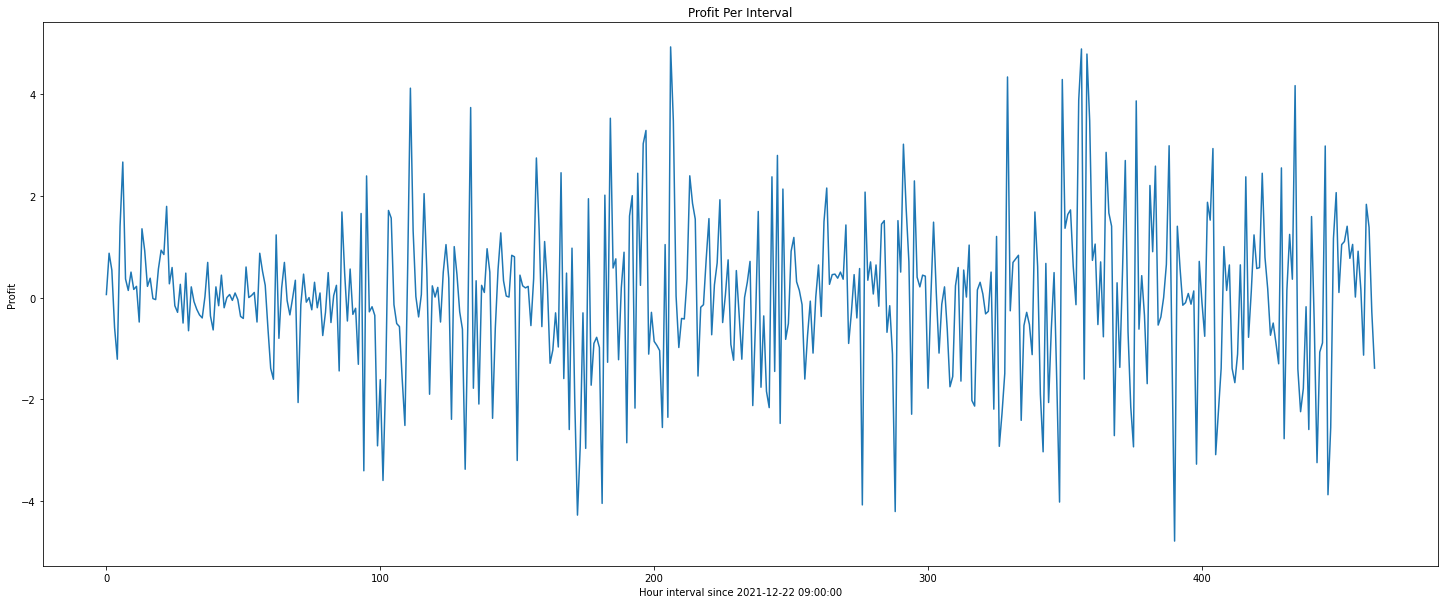

In [ ]:
df_reindex['Profit'].plot(figsize=(25, 10), \
                          title="Profit Per Interval", \
                          xlabel="Hour interval since {}".format(df_reindex.iloc[0]['Timestamp']), \
                          ylabel = 'Profit')

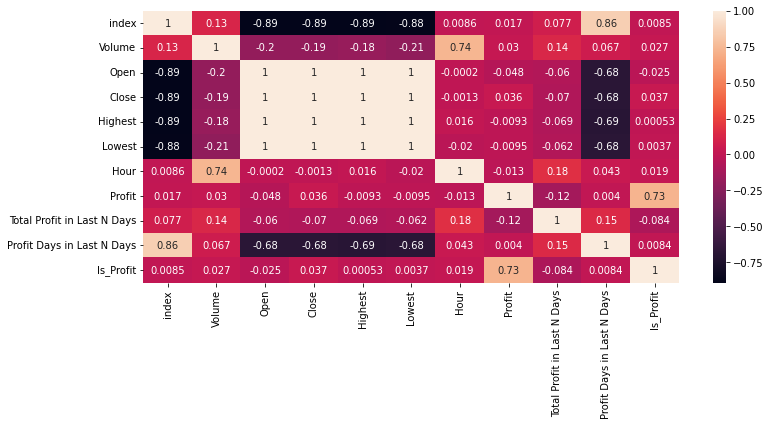

In [ ]:
plt.figure(figsize = (12,5))
sns.heatmap(df_reindex.corr(), annot=True)

# Data Training

In [ ]:
df_data = df_reindex.drop(['index', 'Volume', 'Close', 'Highest', 'Lowest', 'Profit', 'Timestamp'],axis=1)

df_data

,Open,Hour,Total Profit in Last N Days,Profit Days in Last N Days,Is_Profit
0,461.98,9,0.0000,0,1
1,462.18,10,0.0000,0,1
2,463.08,11,0.0000,0,1
3,463.60,12,0.0000,0,0
4,463.26,13,0.0000,0,0
...,...,...,...,...,...
459,431.28,12,17.7298,23,0
460,430.10,13,-6.2290,14,1
461,431.93,14,6.8776,15,1
462,433.31,15,-12.5504,16,0


In [ ]:
# Stores classes into an array y, assign classes into an integer value

y = df_data['Is_Profit'].values
y

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [ ]:
# Store features into an array X

X = df_data.iloc[:, df_data.columns != 'Is_Profit'].values

In [ ]:
# Splits the samples randomly into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Standardize the features using the MinMaxScaler class from scikit-learn

sc = MinMaxScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Logistic Regression

start = time.time()
lr = LogisticRegression(max_iter = 1000, random_state=1).fit(X_train_std, y_train)
end = time.time()
lr_train_accuracy = lr.score(X_train_std, y_train)
print('Logistic Regression Training Accuracy:', '%.4f'%lr_train_accuracy)
lr_test_accuracy = lr.score(X_test_std, y_test)
print('Logistic Regression Testing Accuracy:', '%.4f'%lr_test_accuracy)

lr_scores = cross_val_score(lr, X_train, y_train ,scoring= 'accuracy', cv=5)
print("Clf result :", "%0.4f, +- %0.4f" % (lr_scores.mean(), lr_scores.std()))

lr_time = end-start
print('Traning Time:', '%.4f'%lr_time)

Logistic Regression Training Accuracy: 0.5337
Logistic Regression Testing Accuracy: 0.5484
Clf result : 0.4957, +- 0.0452
Traning Time: 0.0088


In [ ]:
# Decision Tree

start = time.time()
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1).fit(X_train_std, y_train)
end = time.time()
tree_train_accuracy = tree.score(X_train_std, y_train)
print('Decision Tree Training Accuracy:', '%.4f'%tree_train_accuracy)
tree_test_accuracy = tree.score(X_test_std, y_test)
print('Decision Tree Testing Accuracy:', '%.4f'%tree_test_accuracy)

tree_scores = cross_val_score(tree, X_train, y_train ,scoring= 'accuracy', cv=5)
print("Clf result :", "%0.4f, +- %0.4f" % (tree_scores.mean(), tree_scores.std()))

tree_time = end-start
print('Traning Time:', '%.4f'%tree_time)

Decision Tree Training Accuracy: 0.5984
Decision Tree Testing Accuracy: 0.4409
Clf result : 0.4741, +- 0.0657
Traning Time: 0.0024


In [ ]:
# Random Forest

start = time.time()
forest = RandomForestClassifier(max_samples = 100, random_state=1).fit(X_train_std, y_train) # max_samples = 16 gives the best testing accuracy so far
end = time.time()
forest_train_accuracy = forest.score(X_train_std, y_train)
print('Random Forest Training Accuracy:', '%.4f'%forest_train_accuracy)
forest_test_accuracy = forest.score(X_test_std, y_test)
print('Random Forest Testing Accuracy:', '%.4f'%forest_test_accuracy)

forest_scores = cross_val_score(forest, X_train, y_train ,scoring= 'accuracy', cv=5)
print("Clf result :", "%0.4f, +- %0.4f" % (forest_scores.mean(), forest_scores.std()))

forest_time = end-start
print('Traning Time:', '%.4f'%forest_time)

Random Forest Training Accuracy: 0.8464
Random Forest Testing Accuracy: 0.6452
Clf result : 0.5230, +- 0.0508
Traning Time: 0.1650


In [ ]:
# table1

lr_list = ["Logistic Regression", "%.4f"%lr_train_accuracy, "%0.4f +/- %0.4f" % (lr_scores.mean(), lr_scores.std()), 
           "%.4f"%lr_test_accuracy, "%.4f"%lr_time]

tree_list = ["Decision Tree", "%.4f"%tree_train_accuracy, "%0.4f +/- %0.4f" % (tree_scores.mean(), tree_scores.std()), 
           "%.4f"%tree_test_accuracy, "%.4f"%tree_time]

forest_list = ["Random Forest", "%.4f"%forest_train_accuracy, "%0.4f +/- %0.4f" % (forest_scores.mean(), forest_scores.std()), 
           "%.4f"%forest_test_accuracy, "%.4f"%forest_time]

pd.DataFrame([lr_list, tree_list, forest_list], columns=['Model', 'Training Accuracy', 'Cross Validation Score', 'Testing Accuracy', 'Training Time(sec)'])

,Model,Training Accuracy,Cross Validation Score,Testing Accuracy,Training Time(sec)
0,Logistic Regression,0.5337,0.4957 +/- 0.0452,0.5484,0.0088
1,Decision Tree,0.5984,0.4741 +/- 0.0657,0.4409,0.0024
2,Random Forest,0.8464,0.5230 +/- 0.0508,0.6452,0.1650
